# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('./data/application_train_vf.csv')
test = pd.read_csv('./data/application_test_vf.csv')
# bureau = pd.read_csv('./data/bureau.csv')
# credit_card = pd.read_csv('./data/credit_card_balance.csv')
# bureau_balance = pd.read_csv('./data/bureau_balance.csv')

install_pay = pd.read_csv('./data/installments_payments.csv')
# pos_cash = pd.read_csv('./data/POS_CASH_balance.csv')
# previous_app = pd.read_csv('./data/previous_application.csv')

In [3]:
data['SK_ID_CURR'].nunique()
data["date_mensuelle"] = pd.to_datetime(data["date_mensuelle"])
data['date_trimestrielle'] = data['date_mensuelle'].dt.year.astype(str) + '_' + data['date_mensuelle'].dt.quarter.astype(str)

In [4]:
data

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,date_mensuelle,date_trimestrielle
0,0,333721,0,Cash loans,M,Y,Y,1,292500.0,1102500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2013-01-01,2013_1
1,1,250254,0,Cash loans,F,N,Y,0,180000.0,270000.0,...,0,0,0.0,0.0,0.0,1.0,1.0,5.0,2013-01-01,2013_1
2,2,265071,0,Cash loans,F,Y,N,2,67500.0,80865.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01,2013_1
3,3,227569,0,Cash loans,F,Y,Y,1,157500.0,1078200.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01,2013_1
4,4,212616,0,Cash loans,F,N,N,1,112500.0,225000.0,...,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2013-01-01,2013_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306102,306102,150198,0,Cash loans,F,N,N,0,148500.0,669600.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-01,2020_4
306103,306103,377351,0,Cash loans,F,N,Y,0,90000.0,312768.0,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,2020-12-01,2020_4
306104,306104,365430,0,Cash loans,F,N,Y,0,157500.0,1724220.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01,2020_4
306105,306105,342888,0,Cash loans,M,N,Y,0,63000.0,177768.0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,2020-12-01,2020_4


In [5]:
install_pay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [6]:
install_pay.shape

(13605401, 8)

In [7]:
# previous_app = pd.read_csv('./data/previous_application.csv')

In [8]:
import pandas as pd

# Supposons que df soit votre DataFrame
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
pourcentage_valeurs_manquantes = (install_pay.isna().mean() * 100).round(2)

# Afficher le pourcentage de valeurs manquantes pour chaque colonne
print(pourcentage_valeurs_manquantes)

# pour 'install_payments' : 2 variables : DAYS_INSTALMENT peut être utile pour évaluer la ponctualité des paiements. et AMT_INSTALMENT pourrait aider à évaluer la cohérence des paiements par rapport aux montants prévus.
# après les 2 pairs des variables vont dire à peu pres la meme chose, dcp je choisis les 2 qui n'ont pas de NaN 

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NUM_INSTALMENT_VERSION    0.00
NUM_INSTALMENT_NUMBER     0.00
DAYS_INSTALMENT           0.00
DAYS_ENTRY_PAYMENT        0.02
AMT_INSTALMENT            0.00
AMT_PAYMENT               0.02
dtype: float64


In [9]:
install_pay.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [10]:
install_pay_2 = install_pay[['SK_ID_PREV', "SK_ID_CURR", "DAYS_INSTALMENT", "AMT_INSTALMENT"]]
install_pay_2 #13M lignes 

,SK_ID_PREV,SK_ID_CURR,DAYS_INSTALMENT,AMT_INSTALMENT
0,1054186,161674,-1180.0,6948.360
1,1330831,151639,-2156.0,1716.525
2,2085231,193053,-63.0,25425.000
3,2452527,199697,-2418.0,24350.130
4,2714724,167756,-1383.0,2165.040
...,...,...,...,...
13605396,2186857,428057,-1624.0,67.500
13605397,1310347,414406,-1539.0,67.500
13605398,1308766,402199,-7.0,43737.435
13605399,1062206,409297,-1986.0,67.500


### faire la moyenne pour chaque id unique 

In [11]:
install_pay_2['SK_ID_CURR'].nunique()
# data_train : 306107

339587

In [12]:
# Regroupement par code identifiant et calcul des moyennes
df = install_pay_2.groupby('SK_ID_CURR').mean().reset_index()
df

,SK_ID_CURR,SK_ID_PREV,DAYS_INSTALMENT,AMT_INSTALMENT
0,100001,1.576389e+06,-2187.714286,5885.132143
1,100002,1.038818e+06,-295.000000,11559.247105
2,100003,2.290070e+06,-1378.160000,64754.586000
3,100004,1.564014e+06,-754.000000,7096.155000
4,100005,2.495675e+06,-586.000000,6240.205000
...,...,...,...,...
339582,456251,2.248017e+06,-120.000000,7492.924286
339583,456252,1.503599e+06,-2391.000000,10069.867500
339584,456253,1.753310e+06,-2372.928571,4399.707857
339585,456254,1.898777e+06,-142.263158,10239.832895


### merge

In [13]:
test.shape

(48732, 123)

In [14]:
test = pd.read_csv('./data/application_test_vf.csv')

# Fusionner les deux DataFrames en fonction de la colonne 'id' en conservant uniquement les lignes de df1
merged_test = pd.merge(test, df, on='SK_ID_CURR', how='left')
merged_test

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,date_mensuelle,SK_ID_PREV,DAYS_INSTALMENT,AMT_INSTALMENT
0,0,208550,Cash loans,M,Y,Y,2,450000.0,854896.5,36351.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,2.777062e+06,-369.000000,17200.328478
1,1,135823,Cash loans,F,Y,Y,1,112500.0,559368.0,30474.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2021-01-01,1.925262e+06,-214.000000,9406.061250
2,2,356873,Cash loans,F,Y,Y,0,180000.0,531706.5,24768.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2021-01-01,1.639914e+06,-1070.000000,73988.430000
3,3,451831,Cash loans,F,Y,Y,0,67500.0,252000.0,12996.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2021-01-01,1.121222e+06,-124.000000,8296.155000
4,4,438187,Cash loans,M,N,Y,0,135000.0,318528.0,19615.5,...,0.0,0.0,0.0,0.0,0.0,4.0,2021-01-01,2.257903e+06,-1305.000000,10106.383661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48727,48727,378115,Cash loans,F,N,Y,0,148500.0,675000.0,21906.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2021-12-01,1.837310e+06,-1604.220183,707.165917
48728,48728,132127,Cash loans,M,N,N,0,135000.0,440784.0,34956.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,1.641150e+06,-343.000000,12589.162500
48729,48729,153520,Cash loans,F,N,Y,0,225000.0,512446.5,30645.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021-12-01,1.006498e+06,-332.000000,24120.450000
48730,48730,127407,Cash loans,F,Y,N,2,202500.0,1800000.0,62698.5,...,0.0,0.0,0.0,0.0,2.0,3.0,2021-12-01,1.824090e+06,-2009.333333,36188.680500


In [15]:
# Fusionner les deux DataFrames en fonction de la colonne 'id' en conservant uniquement les lignes de df1
merged_df = pd.merge(data, df, on='SK_ID_CURR', how='left')
merged_df

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,date_mensuelle,date_trimestrielle,SK_ID_PREV,DAYS_INSTALMENT,AMT_INSTALMENT
0,0,333721,0,Cash loans,M,Y,Y,1,292500.0,1102500.0,...,0.0,0.0,0.0,0.0,1.0,2013-01-01,2013_1,2.424517e+06,-413.750000,16194.380625
1,1,250254,0,Cash loans,F,N,Y,0,180000.0,270000.0,...,0.0,0.0,1.0,1.0,5.0,2013-01-01,2013_1,1.658561e+06,-541.971014,5796.349565
2,2,265071,0,Cash loans,F,Y,N,2,67500.0,80865.0,...,0.0,0.0,0.0,0.0,0.0,2013-01-01,2013_1,1.287059e+06,-171.000000,4647.915000
3,3,227569,0,Cash loans,F,Y,Y,1,157500.0,1078200.0,...,0.0,0.0,0.0,0.0,0.0,2013-01-01,2013_1,1.899313e+06,-214.000000,5162.205000
4,4,212616,0,Cash loans,F,N,N,1,112500.0,225000.0,...,0.0,0.0,0.0,2.0,0.0,2013-01-01,2013_1,2.677445e+06,-2356.000000,7946.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306102,306102,150198,0,Cash loans,F,N,N,0,148500.0,669600.0,...,0.0,0.0,0.0,0.0,0.0,2020-12-01,2020_4,2.016568e+06,-1965.000000,16484.292000
306103,306103,377351,0,Cash loans,F,N,Y,0,90000.0,312768.0,...,0.0,0.0,0.0,2.0,2.0,2020-12-01,2020_4,1.750954e+06,-1174.214286,10342.788750
306104,306104,365430,0,Cash loans,F,N,Y,0,157500.0,1724220.0,...,NaN,NaN,NaN,NaN,NaN,2020-12-01,2020_4,NaN,NaN,NaN
306105,306105,342888,0,Cash loans,M,N,Y,0,63000.0,177768.0,...,0.0,0.0,1.0,0.0,0.0,2020-12-01,2020_4,1.035969e+06,-263.000000,5181.525000


In [16]:
for col in ["DAYS_INSTALMENT", "AMT_INSTALMENT"]:
    if merged_df[col].isna().sum()/merged_df.shape[0] > 0.35: merged_df.dropna(subset=[col], inplace=True)
    else: merged_df.fillna({col: merged_df[col].median()}, inplace=True)

## discrétisation sur var num

In [17]:
from deap import base, creator, tools, algorithms
from functools import  partial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="deap.creator")

In [18]:
num = ["DAYS_INSTALMENT", "AMT_INSTALMENT"]
 
var_to_categorize = [var for var in num if merged_df[var].nunique() < 20]
num_final = [var for var in num if var not in var_to_categorize]


In [19]:
for i in num:
    print(merged_df[i].nunique())

182854
286879


In [20]:
var_to_categorize

[]

In [21]:
num_final

['DAYS_INSTALMENT', 'AMT_INSTALMENT']

In [22]:
dict_variables = {}

for var in num_final:
    dict_variables[var] = 2
print(dict_variables)

{'DAYS_INSTALMENT': 2, 'AMT_INSTALMENT': 2}


In [23]:
def calculate_stability(column):
    stability_df = merged_df.groupby(['date_mensuelle', column])['TARGET'].mean().unstack()
    
    stability_df['stability'] = stability_df.std(axis=1) / stability_df.mean(axis=1)
    return stability_df

In [24]:
def plot_stability(variable):
    stability_df = calculate_stability(variable)  
    plt.figure(figsize=(10, 5))
    
    for class_label in stability_df.drop('stability', axis=1).columns:
        values = stability_df[class_label]
        plt.plot(stability_df.index, values, label=f'Classe {class_label}', marker='o')
    
    plt.title(f'Stabilité de l\'impact sur la cible pour {variable}')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible TARGET')
    plt.legend(title=f'Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
def evalChi2(individual, variable):
    individual_sorted = sorted(individual)
    percentiles = [max(0, min(i * 100, 100)) for i in individual_sorted]
    thresholds = np.percentile(merged_df[variable].dropna(), percentiles)
    
    thresholds = np.unique(thresholds)
    
    disc_var = np.digitize(merged_df[variable], thresholds)
    merged_df['disc_var'] = disc_var
    
    contingency_table = pd.crosstab(merged_df['disc_var'], merged_df['TARGET'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2,

In [26]:
def Run_Genetic_Discretisation(VARIABLE, NB_CLASSES_MAX):
    NB_GEN = 50
    POP_SIZE = 100  
    CXPB, MUTPB = 0.5, 0.2  

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    def custom_crossover(ind1, ind2):
        if len(ind1) > 1 and len(ind2) > 1:
            return tools.cxTwoPoint(ind1, ind2)
        else:
            return ind1, ind2

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=NB_CLASSES_MAX)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", partial(evalChi2, variable=VARIABLE))
    toolbox.register("mate", custom_crossover)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=POP_SIZE)
    algorithms.eaSimple(population, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NB_GEN, verbose=True)
    
    best_ind = tools.selBest(population, 1)[0]
    return(best_ind)

gen	nevals
0  	100   
1  	60    
2  	66    
3  	55    
4  	71    
5  	47    
6  	61    
7  	56    
8  	51    
9  	65    
10 	59    
11 	64    
12 	56    
13 	55    
14 	57    
15 	53    
16 	57    
17 	55    
18 	63    
19 	62    
20 	67    
21 	59    
22 	60    
23 	56    
24 	64    
25 	57    
26 	48    
27 	68    
28 	65    
29 	63    
30 	66    
31 	71    
32 	61    
33 	58    
34 	72    
35 	64    
36 	60    
37 	52    
38 	53    
39 	53    
40 	63    
41 	56    
42 	61    
43 	61    
44 	60    
45 	51    
46 	63    
47 	63    
48 	70    
49 	58    
50 	54    


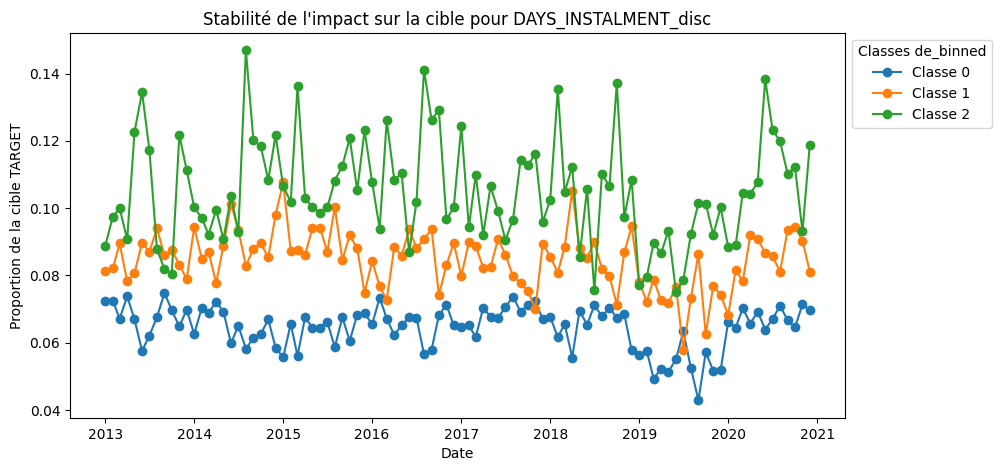

gen	nevals
0  	100   
1  	53    
2  	62    
3  	68    
4  	50    
5  	51    
6  	54    
7  	66    
8  	64    
9  	66    
10 	75    
11 	55    
12 	59    
13 	58    
14 	66    
15 	65    
16 	46    
17 	53    
18 	69    
19 	61    
20 	56    
21 	51    
22 	67    
23 	65    
24 	61    
25 	69    
26 	63    
27 	53    
28 	59    
29 	64    
30 	51    
31 	54    
32 	67    
33 	57    
34 	64    
35 	63    
36 	63    
37 	52    
38 	62    
39 	71    
40 	60    
41 	57    
42 	66    
43 	67    
44 	55    
45 	65    
46 	53    
47 	65    
48 	61    
49 	62    
50 	61    


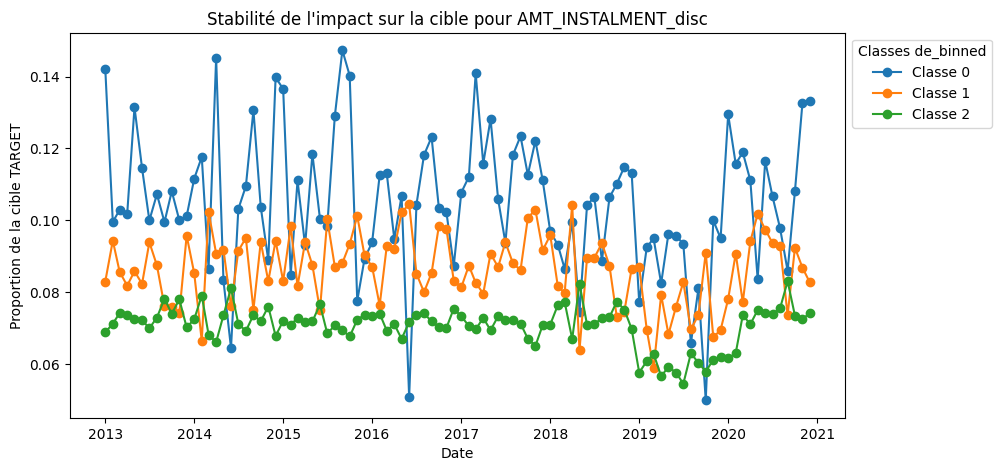

In [27]:
for variable in dict_variables : 
    bins = Run_Genetic_Discretisation(variable, dict_variables[variable])
    bins_normalise = sorted([min(1, max(0, val)) for val in bins])
    
    seuils = np.percentile(merged_df[variable].dropna(), [val * 100 for val in bins_normalise])
    seuils_uniques = np.unique(seuils)
    
    merged_df[f'{variable}_disc'] = np.digitize(merged_df[variable], seuils_uniques)
    
    stability_merged_df = calculate_stability(f'{variable}_disc')  
    plt.figure(figsize=(10, 5))
    
    for class_label in stability_merged_df.drop('stability', axis=1).columns:
        values = stability_merged_df[class_label]
        plt.plot(stability_merged_df.index, values, label=f'Classe {class_label}', marker='o')
    
    plt.title(f'Stabilité de l\'impact sur la cible pour {variable}_disc')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible TARGET')
    plt.legend(title=f'Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

## 2 catégories 

In [28]:
dict_variables = {}

for var in num_final:
    dict_variables[var] = 1
print(dict_variables)

{'DAYS_INSTALMENT': 1, 'AMT_INSTALMENT': 1}


gen	nevals
0  	100   
1  	51    
2  	60    
3  	60    
4  	63    
5  	70    
6  	65    
7  	57    
8  	53    
9  	60    
10 	63    
11 	65    
12 	58    
13 	57    
14 	67    
15 	59    
16 	56    
17 	64    
18 	61    
19 	62    
20 	62    
21 	52    
22 	69    
23 	58    
24 	55    
25 	57    
26 	65    
27 	62    
28 	61    
29 	65    
30 	61    
31 	57    
32 	57    
33 	60    
34 	56    
35 	53    
36 	65    
37 	61    
38 	54    
39 	65    
40 	59    
41 	65    
42 	60    
43 	65    
44 	62    
45 	53    
46 	59    
47 	55    
48 	54    
49 	63    
50 	54    


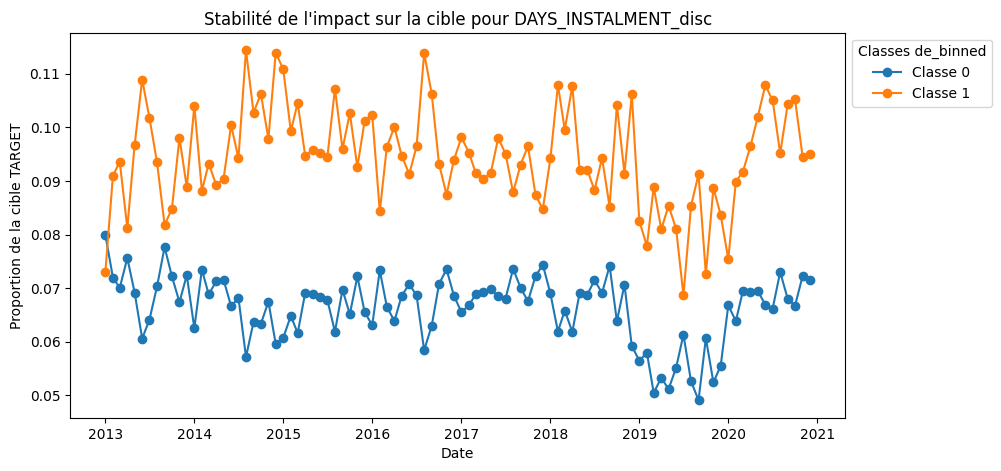

gen	nevals
0  	100   
1  	58    
2  	64    
3  	55    
4  	56    
5  	71    
6  	72    
7  	58    
8  	57    
9  	60    
10 	46    
11 	63    
12 	60    
13 	59    
14 	61    
15 	75    
16 	62    
17 	61    
18 	49    
19 	61    
20 	61    
21 	70    
22 	71    
23 	50    
24 	57    
25 	71    
26 	51    
27 	62    
28 	52    
29 	63    
30 	57    
31 	63    
32 	64    
33 	60    
34 	63    
35 	58    
36 	59    
37 	73    
38 	71    
39 	64    
40 	55    
41 	65    
42 	62    
43 	52    
44 	65    
45 	72    
46 	70    
47 	62    
48 	54    
49 	57    
50 	61    


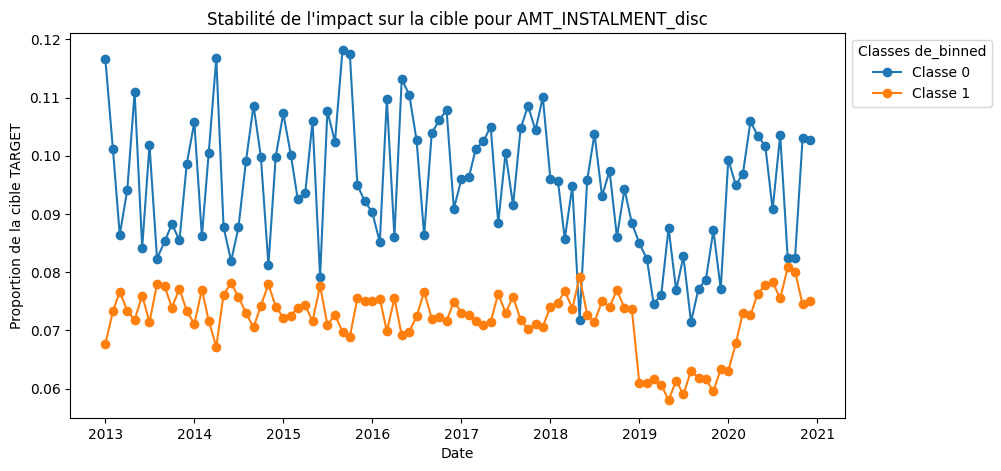

In [29]:
for variable in dict_variables : 
    bins = Run_Genetic_Discretisation(variable, dict_variables[variable])
    bins_normalise = sorted([min(1, max(0, val)) for val in bins])
    
    seuils = np.percentile(merged_df[variable].dropna(), [val * 100 for val in bins_normalise])
    seuils_uniques = np.unique(seuils)
    
    merged_df[f'{variable}_disc'] = np.digitize(merged_df[variable], seuils_uniques)
    
    stability_merged_df = calculate_stability(f'{variable}_disc')  
    plt.figure(figsize=(10, 5))
    
    for class_label in stability_merged_df.drop('stability', axis=1).columns:
        values = stability_merged_df[class_label]
        plt.plot(stability_merged_df.index, values, label=f'Classe {class_label}', marker='o')
    
    plt.title(f'Stabilité de l\'impact sur la cible pour {variable}_disc')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible TARGET')
    plt.legend(title=f'Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()